# Datasets

* Dataset: almacena las muestras y sus etiquetas

* Dataloaders: genera un iterable sobre el dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [5]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

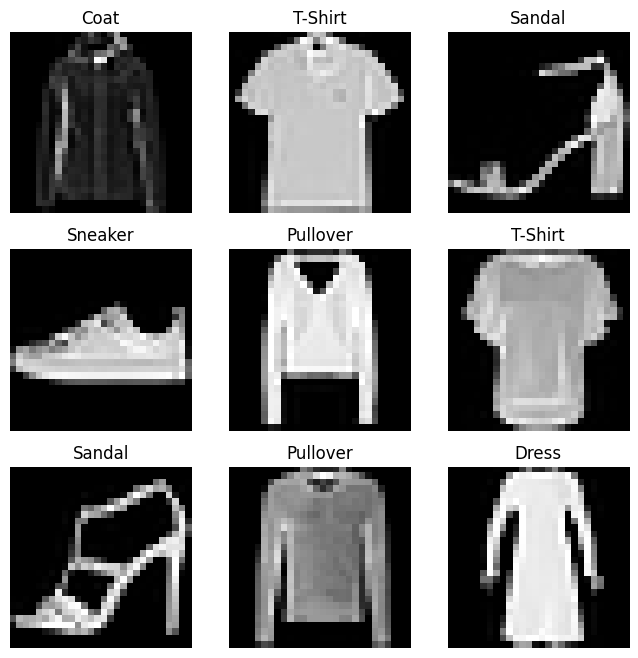

In [4]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3

for i in range(1, cols*rows+1):
    sample_index = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_index]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# DataLoaders

In [6]:
from torch.utils.data import DataLoader

In [7]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [9]:
train_features, train_labels = next(iter(train_dataloader))

print( train_features.size() )
print( train_labels.size() )

torch.Size([64, 1, 28, 28])
torch.Size([64])


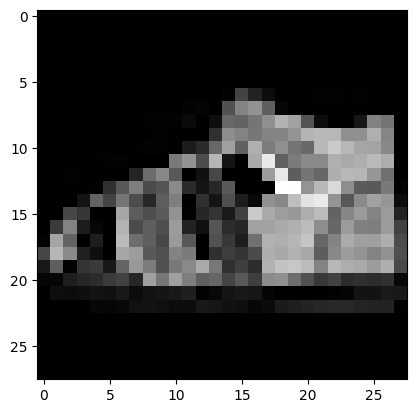

In [10]:
img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()